In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
poverty = "ACS_2017_Poverty_Status_Variables_Tract.csv"

In [20]:
poverty_df = pd.read_csv(poverty)

In [21]:
poverty_df

,OBJECTID,GEOID,ALAND,AWATER,NAME,State,County,B17020_001E,B17020_001M,B17020_002E,...,B17020_calc_numChildPovE,B17020_calc_numChildPovM,B17020_calc_pctChildPovE,B17020_calc_pctChildPovM,Shape__Area,Shape__Length,B17020_calc_numTotChildE,B17020_calc_numTotChildM,Shape__Area_2,Shape__Length_2
0,1,11001000100,1907610,512798,Census Tract 1,District of Columbia,District of Columbia,5151,348,248,...,27,38,3.4,4.610801,3.157970e+06,16275.593084,802,257,3.157970e+06,16275.593084
1,2,11001000201,503312,0,Census Tract 2.01,District of Columbia,District of Columbia,24,56,24,...,0,21,NaN,NaN,8.324142e+05,4265.956241,0,29,8.324142e+05,4265.956241
2,3,11001000202,776630,428562,Census Tract 2.02,District of Columbia,District of Columbia,3595,557,582,...,0,21,0.0,5.898876,1.284189e+06,13196.755434,356,141,1.284189e+06,13196.755434
3,4,11001000300,1010813,2334,Census Tract 3,District of Columbia,District of Columbia,6374,569,1184,...,29,37,3.4,4.296579,1.676009e+06,5244.313860,847,196,1.676009e+06,5244.313860
4,5,11001000400,1542760,69,Census Tract 4,District of Columbia,District of Columbia,1485,130,169,...,28,27,10.0,9.329003,2.552696e+06,7468.467690,281,65,2.552696e+06,7468.467690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,175,11001010700,891593,0,Census Tract 107,District of Columbia,District of Columbia,1589,140,322,...,0,21,0.0,233.333333,1.474360e+06,4919.356124,9,30,1.474360e+06,4919.356124
175,176,11001010800,661579,0,Census Tract 108,District of Columbia,District of Columbia,1263,172,576,...,0,29,NaN,NaN,1.093809e+06,4478.867308,0,42,1.093809e+06,4478.867308
176,177,11001010900,2379832,2936613,Census Tract 109,District of Columbia,District of Columbia,4043,810,1772,...,580,193,46.4,10.526335,3.943688e+06,12536.810228,1251,304,3.943688e+06,12536.810228
177,178,11001011000,649469,368702,Census Tract 110,District of Columbia,District of Columbia,3667,356,242,...,0,21,0.0,9.677419,1.073003e+06,5981.058107,217,164,1.073003e+06,5981.058107


In [22]:
sub_poverty_df = pd.DataFrame(poverty_df, columns=["NAME","B17020_calc_pctPovE", "B17020_calc_pctChildPovE"])
sub_poverty_df

,NAME,B17020_calc_pctPovE,B17020_calc_pctChildPovE
0,Census Tract 1,4.8,3.4
1,Census Tract 2.01,100.0,NaN
2,Census Tract 2.02,16.2,0.0
3,Census Tract 3,18.6,3.4
4,Census Tract 4,11.4,10.0
...,...,...,...
174,Census Tract 107,20.3,0.0
175,Census Tract 108,45.6,NaN
176,Census Tract 109,43.8,46.4
177,Census Tract 110,6.6,0.0


In [23]:
renamed_df = sub_poverty_df.rename(columns={"NAME":"Census Tract","B17020_calc_pctPovE":"Pct_Pop_Below", "B17020_calc_pctChildPovE":"Pct_Child_Below"})
renamed_df.head()

,Census Tract,Pct_Pop_Below,Pct_Child_Below
0,Census Tract 1,4.8,3.4
1,Census Tract 2.01,100.0,NaN
2,Census Tract 2.02,16.2,0.0
3,Census Tract 3,18.6,3.4
4,Census Tract 4,11.4,10.0


In [24]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Census Tract     179 non-null    object 
 1   Pct_Pop_Below    179 non-null    float64
 2   Pct_Child_Below  176 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.3+ KB


In [25]:
renamed_df.describe()

,Pct_Pop_Below,Pct_Child_Below
count,179.000000,176.000000
mean,18.561453,20.765909
std,14.321153,21.254587
min,0.000000,0.000000
25%,7.950000,0.000000
50%,14.700000,13.250000
75%,25.900000,38.050000
max,100.000000,77.100000


In [26]:
renamed2_df = renamed_df.fillna(0)
renamed2_df

,Census Tract,Pct_Pop_Below,Pct_Child_Below
0,Census Tract 1,4.8,3.4
1,Census Tract 2.01,100.0,0.0
2,Census Tract 2.02,16.2,0.0
3,Census Tract 3,18.6,3.4
4,Census Tract 4,11.4,10.0
...,...,...,...
174,Census Tract 107,20.3,0.0
175,Census Tract 108,45.6,0.0
176,Census Tract 109,43.8,46.4
177,Census Tract 110,6.6,0.0


In [27]:
renamed2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Census Tract     179 non-null    object 
 1   Pct_Pop_Below    179 non-null    float64
 2   Pct_Child_Below  179 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.3+ KB


In [28]:
pop_sort = renamed2_df.sort_values(by='Pct_Pop_Below', ascending=False)
pop_sort

,Census Tract,Pct_Pop_Below,Pct_Child_Below
1,Census Tract 2.01,100.0,0.0
93,Census Tract 74.01,64.6,69.0
98,Census Tract 74.08,52.6,77.1
80,Census Tract 64,49.4,75.8
130,Census Tract 88.03,48.6,62.6
...,...,...,...
60,Census Tract 42.01,3.1,0.0
6,Census Tract 5.02,2.8,0.0
13,Census Tract 9.02,2.2,0.7
121,Census Tract 81,1.7,0.0


In [29]:
pop_sort_top_ten = pop_sort.head(10)
pop_sort_top_ten.set_index("Census Tract")

,Pct_Pop_Below,Pct_Child_Below
Census Tract,,
Census Tract 2.01,100.0,0.0
Census Tract 74.01,64.6,69.0
Census Tract 74.08,52.6,77.1
Census Tract 64,49.4,75.8
Census Tract 88.03,48.6,62.6
Census Tract 74.06,48.5,55.5
Census Tract 98.02,48.0,66.9
Census Tract 68.04,47.0,0.0
Census Tract 108,45.6,0.0


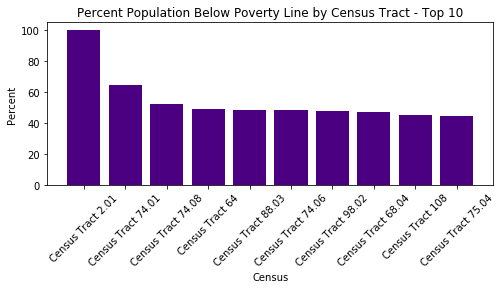

In [41]:
x_axis = np.arange(len(pop_sort_top_ten))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(8,3))
plt.bar(x_axis, pop_sort_top_ten["Pct_Pop_Below"], color='indigo', alpha=1, align="center")
plt.xticks(tick_locations, pop_sort_top_ten["Census Tract"], rotation="45")
plt.xlabel('Census')
plt.ylabel('Percent')
plt.title('Percent Population Below Poverty Line by Census Tract - Top 10')
plt.show()

In [31]:
child_sort = renamed2_df.sort_values(by='Pct_Child_Below', ascending=False)
child_sort

,Census Tract,Pct_Pop_Below,Pct_Child_Below
98,Census Tract 74.08,52.6,77.1
80,Census Tract 64,49.4,75.8
93,Census Tract 74.01,64.6,69.0
155,Census Tract 98.02,48.0,66.9
154,Census Tract 98.01,41.4,65.8
...,...,...,...
74,Census Tract 53.01,10.3,0.0
148,Census Tract 95.09,3.9,0.0
33,Census Tract 22.01,7.1,0.0
123,Census Tract 83.01,3.4,0.0


In [32]:
child_sort_top_ten = child_sort.head(10)
child_sort_top_ten.set_index("Census Tract")

,Pct_Pop_Below,Pct_Child_Below
Census Tract,,
Census Tract 74.08,52.6,77.1
Census Tract 64,49.4,75.8
Census Tract 74.01,64.6,69.0
Census Tract 98.02,48.0,66.9
Census Tract 98.01,41.4,65.8
Census Tract 88.03,48.6,62.6
Census Tract 75.04,45.0,59.8
Census Tract 96.01,41.0,59.5
Census Tract 46,17.0,59.3


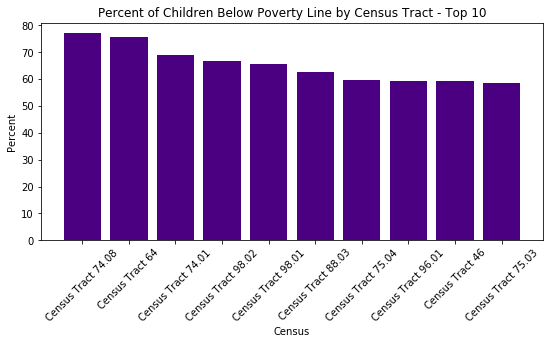

In [45]:
x_axis = np.arange(len(child_sort_top_ten))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(9,4))
plt.bar(x_axis, child_sort_top_ten["Pct_Child_Below"], color='indigo', alpha=1, align="center")
plt.xticks(tick_locations, child_sort_top_ten["Census Tract"], rotation="45")
plt.xlabel('Census')
plt.ylabel('Percent')
plt.title('Percent of Children Below Poverty Line by Census Tract - Top 10')
plt.show()

In [34]:
pop_sort_bottom_ten = pop_sort.tail(10)
pop_sort_bottom_ten.set_index("Census Tract")

,Pct_Pop_Below,Pct_Child_Below
Census Tract,,
Census Tract 80.01,3.6,0.0
Census Tract 66,3.6,0.0
Census Tract 83.02,3.5,0.0
Census Tract 40.01,3.5,0.0
Census Tract 83.01,3.4,0.0
Census Tract 42.01,3.1,0.0
Census Tract 5.02,2.8,0.0
Census Tract 9.02,2.2,0.7
Census Tract 81,1.7,0.0


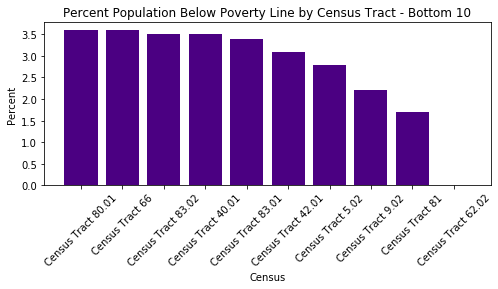

In [42]:
x_axis = np.arange(len(pop_sort_bottom_ten))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(8,3))
plt.bar(x_axis, pop_sort_bottom_ten["Pct_Pop_Below"], color='indigo', alpha=1, align="center")
plt.xticks(tick_locations, pop_sort_bottom_ten["Census Tract"], rotation="45")
plt.xlabel('Census')
plt.ylabel('Percent')
plt.title('Percent Population Below Poverty Line by Census Tract - Bottom 10')
plt.show()

In [38]:
child_sort_bottom_ten = child_sort.tail(10)
child_sort_bottom_ten.set_index("Census Tract")

,Pct_Pop_Below,Pct_Child_Below
Census Tract,,
Census Tract 50.02,11.7,0.0
Census Tract 2.01,100.0,0.0
Census Tract 52.01,7.1,0.0
Census Tract 95.03,5.4,0.0
Census Tract 95.04,9.9,0.0
Census Tract 53.01,10.3,0.0
Census Tract 95.09,3.9,0.0
Census Tract 22.01,7.1,0.0
Census Tract 83.01,3.4,0.0


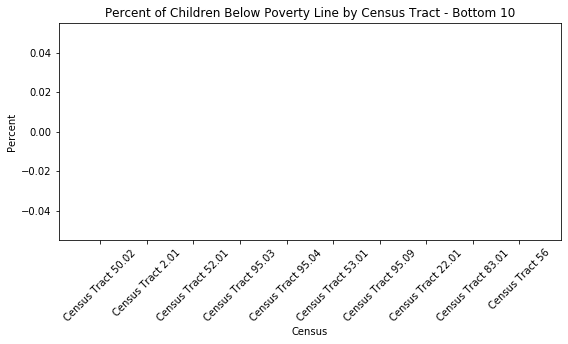

In [43]:
x_axis = np.arange(len(child_sort_bottom_ten))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(9,4))
plt.bar(x_axis, child_sort_bottom_ten["Pct_Child_Below"], color='indigo', alpha=1, align="center")
plt.xticks(tick_locations, child_sort_bottom_ten["Census Tract"], rotation="45")
plt.xlabel('Census')
plt.ylabel('Percent')
plt.title('Percent of Children Below Poverty Line by Census Tract - Bottom 10')
plt.show()